1. Load and Explore the Dataset:

In [53]:


import pandas as pd
import seaborn as sns
import os
os.getcwd()

'/Users/ilaydadenizikendiz/Spring 2024/Social-Sciences-and-Computing-2024-Spring/Datasets/GSS_2022_stata/2022'

In [54]:
path = "/Users/ilaydadenizikendiz/Spring 2024/Social-Sciences-and-Computing-2024-Spring/assignment4/GSS2022.dta"
gss_data = pd.read_stata(path)

print(gss_data.head())

/var/folders/mw/2csswy5j1qn9lgh_0h301f3h0000gn/T/ipykernel_80580/3848379415.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  gss_data = pd.read_stata(path)


   year  id                                            wrkstat  hrs1  hrs2  \
0  2022   1                                  working full time  40.0   NaN   
1  2022   2                                            retired   NaN   NaN   
2  2022   3                                  working full time  52.0   NaN   
3  2022   4  with a job, but not at work because of tempora...   NaN  25.0   
4  2022   5                                              other   NaN   NaN   

  evwork        wrkslf                                          occ10  \
0    NaN  someone else                            managers, all other   
1    yes  someone else                   marketing and sales managers   
2    NaN  someone else                            personal care aides   
3    NaN  someone else                    food servers, nonrestaurant   
4    yes  someone else  industrial and refractory machinery mechanics   

  prestg10                                            indus10  ... rheight  \
0     39.0    

In [55]:
print(gss_data.dtypes)

year              category
id                   int16
wrkstat           category
hrs1              category
hrs2              category
                    ...   
totalincentive    category
wtssps_nea        category
wtssnrps_nea      category
wtssps_next       category
wtssnrps_next     category
Length: 879, dtype: object


In [56]:
print(gss_data.isnull().sum())

year                 0
id                   0
wrkstat              7
hrs1              1606
hrs2              3459
                  ... 
totalincentive       0
wtssps_nea        2701
wtssnrps_nea      2701
wtssps_next       2309
wtssnrps_next     2309
Length: 879, dtype: int64


2. Descriptive Statistics:

In [57]:
gss_data['hrs1'] = pd.to_numeric(gss_data['hrs1'], errors='coerce')
gss_data['prestg10'] = pd.to_numeric(gss_data['prestg10'], errors='coerce')
gss_data['rheight'] = pd.to_numeric(gss_data['rheight'], errors='coerce')
descriptive_stats = gss_data[['hrs1', 'prestg10', 'rheight']].describe()
print(descriptive_stats)

              hrs1     prestg10     rheight
count  1925.000000  3326.000000  1127.00000
mean     39.851948    44.924835    66.83496
std      13.570192    13.571545     4.23775
min       0.000000    16.000000    53.00000
25%      36.000000    35.000000    64.00000
50%      40.000000    45.000000    66.00000
75%      45.000000    54.000000    70.00000
max      85.000000    80.000000    95.00000


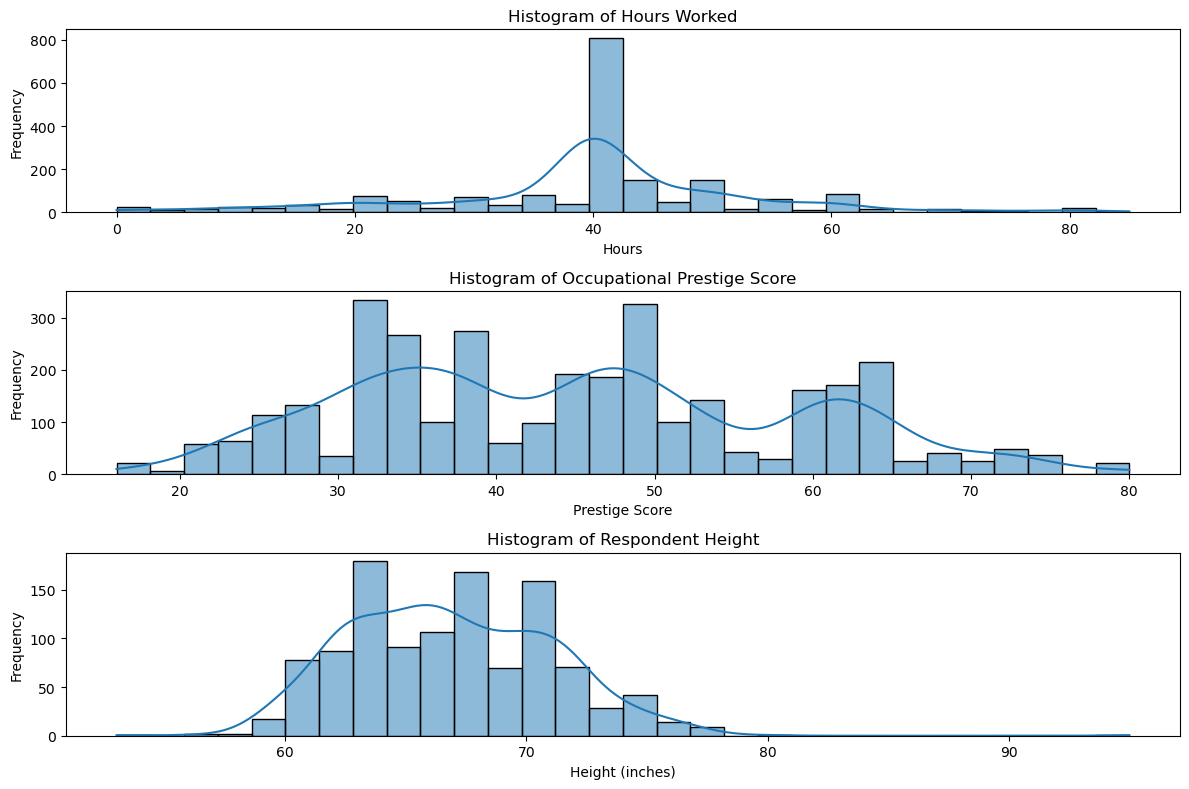

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Histogram for 'hrs1' (Hours Worked)
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
sns.histplot(data=gss_data, x='hrs1', bins=30, kde=True)
plt.title('Histogram of Hours Worked')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Histogram for 'prestg10' (Occupational Prestige Score)
plt.subplot(3, 1, 2)
sns.histplot(data=gss_data, x='prestg10', bins=30, kde=True)
plt.title('Histogram of Occupational Prestige Score')
plt.xlabel('Prestige Score')
plt.ylabel('Frequency')

# Histogram for 'rheight' (Respondent Height)
plt.subplot(3, 1, 3)
sns.histplot(data=gss_data, x='rheight', bins=30, kde=True)
plt.title('Histogram of Respondent Height')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

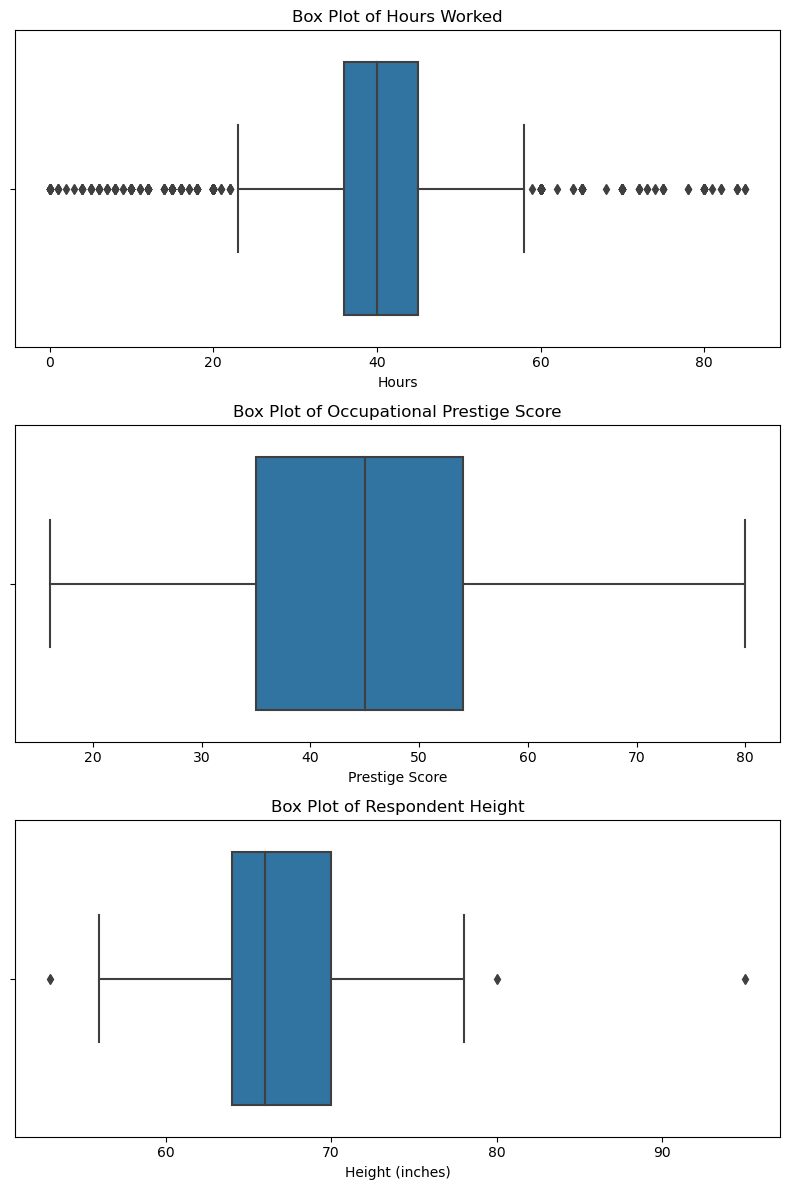

In [59]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 12))

# Box plot for 'hrs1'
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
sns.boxplot(x=gss_data['hrs1'])
plt.title('Box Plot of Hours Worked')
plt.xlabel('Hours')

# Box plot for 'prestg10'
plt.subplot(3, 1, 2)
sns.boxplot(x=gss_data['prestg10'])
plt.title('Box Plot of Occupational Prestige Score')
plt.xlabel('Prestige Score')

# Box plot for 'rheight'
plt.subplot(3, 1, 3)
sns.boxplot(x=gss_data['rheight'])
plt.title('Box Plot of Respondent Height')
plt.xlabel('Height (inches)')

plt.tight_layout()
plt.show()

3. Inferential Statistics:

In [60]:
from scipy import stats

# Filter data for the two groups
self_employed_hours = gss_data[gss_data['wrkslf'] == 'self-employed']['hrs1'].dropna()
employee_hours = gss_data[gss_data['wrkslf'] == 'someone else']['hrs1'].dropna()

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(self_employed_hours, employee_hours)

# Interpret the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("The difference in mean hours worked between self-employed and employees is statistically significant.")
else:
    print("There is no significant difference in mean hours worked between self-employed and employees.")

T-statistic: -2.3003554069278147
P-value: 0.021535018340723796
The difference in mean hours worked between self-employed and employees is statistically significant.


In [61]:
# Calculate confidence intervals for mean hours worked for the entire dataset
mean_hours = gss_data['hrs1'].dropna().mean()
std_dev_hours = gss_data['hrs1'].dropna().std()
n_hours = len(gss_data['hrs1'].dropna())
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, n_hours - 1) * (std_dev_hours / (n_hours ** 0.5))

# Calculate the confidence interval
lower_bound = mean_hours - margin_of_error
upper_bound = mean_hours + margin_of_error

print("Confidence Interval for Mean Hours Worked (95%):", (lower_bound, upper_bound))

Confidence Interval for Mean Hours Worked (95%): (39.24536258100958, 40.45853352288652)


4. Correlation Analysis:

In [62]:
correlation_matrix = gss_data[['hrs1', 'prestg10', 'rheight']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              hrs1  prestg10   rheight
hrs1      1.000000  0.133693  0.108967
prestg10  0.133693  1.000000  0.055671
rheight   0.108967  0.055671  1.000000


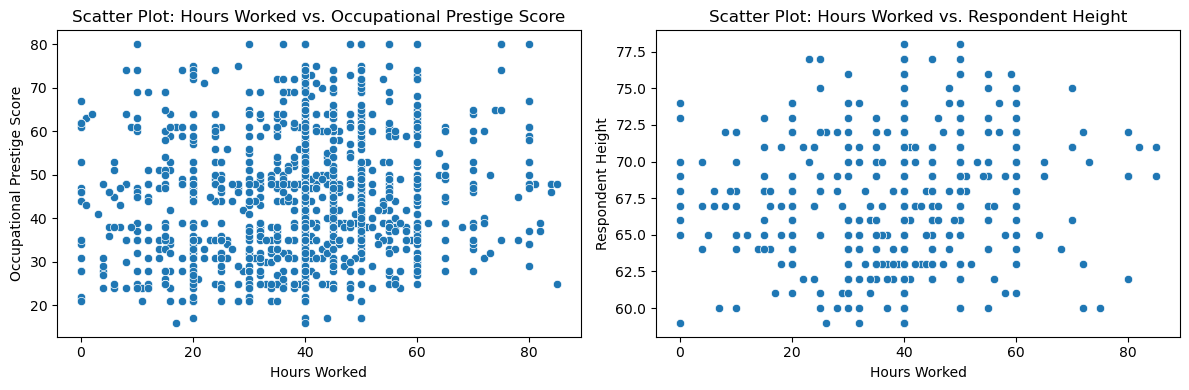

In [63]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 4))

# Scatter plot for 'hrs1' and 'prestg10'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(data=gss_data, x='hrs1', y='prestg10')
plt.title('Scatter Plot: Hours Worked vs. Occupational Prestige Score')
plt.xlabel('Hours Worked')
plt.ylabel('Occupational Prestige Score')

# Scatter plot for 'hrs1' and 'rheight'
plt.subplot(1, 2, 2)
sns.scatterplot(data=gss_data, x='hrs1', y='rheight')
plt.title('Scatter Plot: Hours Worked vs. Respondent Height')
plt.xlabel('Hours Worked')
plt.ylabel('Respondent Height')

plt.tight_layout()
plt.show()

5. Regression Analysis:

In [64]:
import statsmodels.api as sm

# Drop missing values from both variables
gss_data_clean = gss_data[['hrs1', 'prestg10']].dropna()

# Prepare the data
X = gss_data_clean['hrs1']  # Independent variable (hours worked)
X = sm.add_constant(X)  # Add a constant term for the intercept
y = gss_data_clean['prestg10']  # Dependent variable (occupational prestige score)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestg10   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     34.00
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           6.49e-09
Time:                        22:25:44   Log-Likelihood:                -7510.0
No. Observations:                1870   AIC:                         1.502e+04
Df Residuals:                    1868   BIC:                         1.504e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4724      0.965     41.936      0.0

Based on the regression results, the model has limited explanatory power, as indicated by the low R-squared value. While the coefficient for hrs1 is statistically significant, suggesting that hours worked have a significant effect on the occupational prestige score, the magnitude of the effect is relatively small.

6. Model Diagnostics:

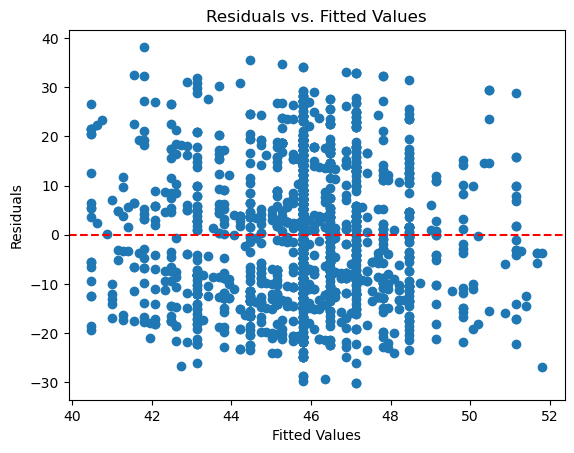

In [65]:
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

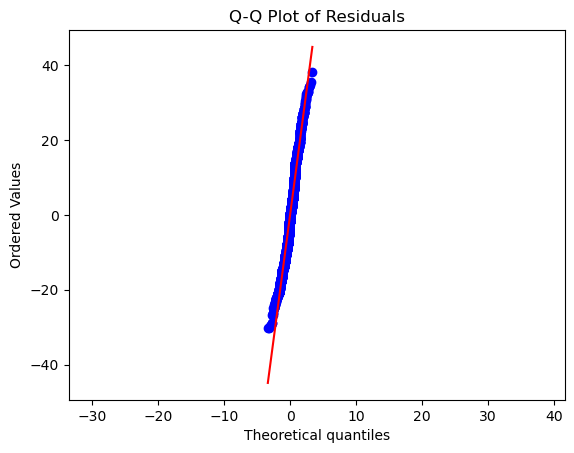

In [66]:
import scipy.stats as stats

# Histogram of residuals
plt.hist(model.resid, bins=30, density=True, alpha=0.5, color='b')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Q-Q plot of residuals
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

Non-Linearity: If the relationship appears to be non-linear, you can consider transforming the independent variable or adding polynomial terms to the model.
Heteroscedasticity: If the variance of residuals increases or decreases with the fitted values, you can consider using heteroscedasticity-robust standard errors or transforming the dependent variable.
Non-Normality: If the residuals are not normally distributed, you can consider transforming the dependent variable or using robust regression techniques.
